## Visualizations

In [456]:
!pwd

/Users/dnsosa/Desktop/AltmanLab/ContradictoryClaims/drug-lit-contradictory-claims/notebooks


In [438]:
import os
import pandas as pd

pd.set_option('display.max_rows', None)

model = "roberta"

output_base_dir = f"/Users/dnsosa/Desktop/AltmanLab/covid_lit_contra_claims/output/from_sherlock/orderedSubseqCompare/{model}"
#res_dir = f"{output_base_dir}/from_sherlock/biobert/TRAIN_roam_mancon_mednli_multinli/VAL_roam_mancon_mednli_multinli/PREPARGS_DR-1_TPE-sequential_T-True/EXP_E-10_B-16_LR-5e-05"
#res_dir = f"{output_base_dir}/bioclinbert/TRAIN_multinli_mednli_mancon_roam/VAL_multinli_mednli_mancon_roam_roamPH_roamDD_roamDDPH/PREPARGS_DR-1_TPE-sequential_T-True/EXP_E-10_B-8_LR-0.0001"

df_list = []
for root,d_names,f_names in os.walk(output_base_dir):
    for f in f_names:
        res_df = pd.read_csv(os.path.join(root, f))
        df_list.append(res_df)
    #res_df = pd.read_csv(f"{res_dir}/val_metrics.csv")
    #df_list.append(res_df)

df = pd.concat(df_list)

def train_seq_to_idx(row, R=4):
    # Only takes into account the number of overlaps, not the order
    full_seq, train_subseq = row["train_datasets"], row["Cumulative Training"]
    
    full_seq_set = set(full_seq.split('_'))
    train_subseq_set = set(train_subseq.split('_'))
    k = len(full_seq_set.intersection(train_subseq_set))
    N = len(full_seq_set)
    return R - N + k

def latest_training(row):
    full_seq = row["Cumulative Training"]
    datasets = full_seq.split("_")
    return datasets[-1]

df["cum_train_idx"] = df.apply(lambda row: train_seq_to_idx(row), axis=1)
df["Latest Training"] = df.apply(lambda row: latest_training(row), axis=1)

#df2[["Validation Set", "train_datasets", "Cumulative Training", "Latest Training", "cum_train_idx", "accuracy", "f1", "precision", "recall", "recall_con"]]
#df2.columns

df[["Validation Set", "train_datasets", "Cumulative Training", "Latest Training", "cum_train_idx", "accuracy", "f1", "precision", "recall", "recall_con", "learning_rate"]]


,Validation Set,train_datasets,Cumulative Training,Latest Training,cum_train_idx,accuracy,f1,precision,recall,recall_con,learning_rate
0,mednli,mednli_mancon_roam,none_mednli,mednli,2,0.370000,0.180049,0.123333,0.333333,0.000000,0.00010
1,mancon,mednli_mancon_roam,none_mednli,mednli,2,0.340000,0.169154,0.113333,0.333333,0.000000,0.00010
2,roam,mednli_mancon_roam,none_mednli,mednli,2,0.477707,0.215517,0.159236,0.333333,0.000000,0.00010
3,roamPH,mednli_mancon_roam,none_mednli,mednli,2,0.000000,0.000000,0.000000,0.000000,-1.000000,0.00010
4,roamDD,mednli_mancon_roam,none_mednli,mednli,2,1.000000,1.000000,1.000000,1.000000,-1.000000,0.00010
5,roamDDPH,mednli_mancon_roam,none_mednli,mednli,2,1.000000,1.000000,1.000000,1.000000,-1.000000,0.00010
6,mednli,mednli_mancon_roam,none_mednli_mancon,mancon,3,0.320000,0.161616,0.106667,0.333333,0.000000,0.00010
7,mancon,mednli_mancon_roam,none_mednli_mancon,mancon,3,0.330000,0.165414,0.110000,0.333333,0.000000,0.00010
8,roam,mednli_mancon_roam,none_mednli_mancon,mancon,3,0.261146,0.138047,0.087049,0.333333,0.000000,0.00010
9,roamPH,mednli_mancon_roam,none_mednli_mancon,mancon,3,1.000000,1.000000,1.000000,1.000000,-1.000000,0.00010


In [437]:
df.columns

Index(['accuracy', 'f1', 'precision', 'recall', 'recall_con',
       'Cumulative Training', 'Validation Set', 'train_datasets',
       'eval_datasets', 'epochs', 'batch_size', 'learning_rate', 'truncation',
       'train_prep_experiment', 'data_ratios', 'SEED', 'mancon_neutral_frac',
       'mancon_train_frac', 'wandb_log_interval', 'cum_train_idx',
       'Latest Training'],
      dtype='object')

In [416]:
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch


def lighten_color(in_hex, lighten_percent):
    in_hex = in_hex.lstrip('#')
    rgb = tuple(int(in_hex[i:i+2], 16) for i in (0, 2, 4))
    light_r, light_g, light_b = [round(val + (255 - val) * lighten_percent) for val in rgb]
    light_hex = f"#{light_r:X}{light_g:X}{light_b:X}"
    
    return light_hex

def draw_arrows(df, metric, x_pad, arrow_prox, arrow_color, y_text_pad, in_ax):
    for i in range(min(df.cum_train_idx), max(df.cum_train_idx)):
        x1, x2 = i, i+1
        #x1_prox = x2 - (x2-x1)*arrow_prox
        #x2_prox = x1 + (x2-x1)*arrow_prox
        y1, y2 = df[df["cum_train_idx"]==i][metric].values[0], df[df["cum_train_idx"]==i+1][metric].values[0]
        y1_prox = y2 - (y2-y1)*arrow_prox
        y2_prox = y1 + (y2-y1)*arrow_prox
        #in_ax.arrow(x1, y1, (x2-x1)*arrow_prox, (y2-y1)*arrow_prox, 
        #            head_width=.05, head_length=.05, facecolor='grey', edgecolor='none', length_includes_head=True, ls='--')
        in_ax.annotate("", xy=(x1+x_pad,y1_prox), xycoords='data', xytext=(x2-x_pad,y2_prox), textcoords='data',
                       arrowprops={'arrowstyle': '<|-, head_width=0.4, head_length=.6',
                                   'connectionstyle': 'arc3',
                                   'facecolor': arrow_color,
                                   'edgecolor': arrow_color,
                                   #'ls': ':',
                                   'lw': 3})
        #latest_train = df[df["cum_train_idx"]==i+1]["Latest Training"].values[0]
        #in_ax.text((x1+x2)/2, (y1_prox+y2_prox)/2 + y_text_pad, f"+ ${latest_train}$", ha="center", va="center", transform_rotates_text=True,
        #           rotation=(np.arctan((y2_prox-y1_prox)/(x2-x1) * 180 / np.pi), size=14, color=arrow_color)
                
    return None

def calculate_data_ratios_dist(train_datasets_list, data_ratio):
    multiplier_datasets = ["multinli", "mednli", "mancon"]
    # Number of times to apply the multiplier
    ratio_multiplier = len(set(multiplier_datasets).intersection(set(train_datasets_list)))
    n_datasets = len(train_datasets_list)
    dist = np.ones(n_datasets)
    for i, dataset in enumerate(train_datasets_list):
        if dataset in multiplier_datasets:
            dist[i] = data_ratio ** ratio_multiplier
            ratio_multiplier -= 1
            
    return dist

def draw_pie_scatter(df, metric, background_color, size, in_ax):
    num_ft_datasets = max(df.cum_train_idx)
    lowest_train_idx = min(df.cum_train_idx)
    for i in range(lowest_train_idx, num_ft_datasets+1): 
        curr_df = df[df["cum_train_idx"]==i]
        train_so_far = curr_df["Cumulative Training"].values[0]
        all_train_datasets = curr_df["train_datasets"].values[0].split("_")
        xpos, ypos = i, curr_df[metric].values[0]
    
        # for incremental pie slices
        data_ratio = curr_df["data_ratios"].values[0]
        dist = calculate_data_ratios_dist(all_train_datasets, data_ratio)
        cumsum = np.cumsum(dist)
        cumsum = cumsum/ cumsum[-1]
        pie = [0] + cumsum.tolist()

        for j, (r1, r2) in enumerate(zip(pie[:-1], pie[1:])):
                        
            train_j = all_train_datasets[j]
            if train_j in train_so_far:
                color = dataset_color_map[train_j]
            else:
                color = background_color
            
            angles = np.pi / 2 - np.linspace(2 * np.pi * r1, 2 * np.pi * r2, num=25)
            
            x = [0] + np.cos(angles).tolist()
            y = [0] + np.sin(angles).tolist()
            
            xy = np.column_stack([x, y])
            
            in_ax.scatter([xpos], [ypos], marker=xy, s=size*1.1, color="black")  # Acts as a border
            in_ax.scatter([xpos], [ypos], marker=xy, s=size, color=color)

    return None

def draw_custom_legends(df, ds_color_map, ds_name_map, val_ds, val_color, in_ax):
    # Train legend
    custom_lines = [Line2D([0], [0], color=ds_color_map[ds], lw=4) for ds in list(ds_color_map.keys())[:4]]
    in_ax.legend(custom_lines, [ds_name_map[ds] for ds in list(ds_color_map.keys())[:4]], 
                 loc='upper left')#, title='Training\n')#, title_fontproperties={'weight':'bold'})
    #train_legend = plt.legend(custom_lines, [ds_name_map[ds] for ds in list(ds_color_map.keys())[:4]], loc='upper left')
    #in_ax.add_artist(train_legend)

    # Val legend
    #custom_patch = [Patch(facecolor=val_color, edgecolor='gray')]
    #in_ax.legend(custom_patch, [ds_name_map[val_ds]], loc='upper right')
    #val_legend = plt.legend(custom_patch, [ds_name_map[val_ds]], loc='upper right')
    #in_ax.add_artist(val_legend)
    
    return None


In [414]:
# Matplotlib parameters

import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "sans-serif",
    #"font.sans-serif": "Helvetica",
    "font.family": "normal",
    "font.size": 22
})

SMALL_SIZE = 16
MEDIUM_SIZE = 22
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


LEARNING RATE: 1e-05


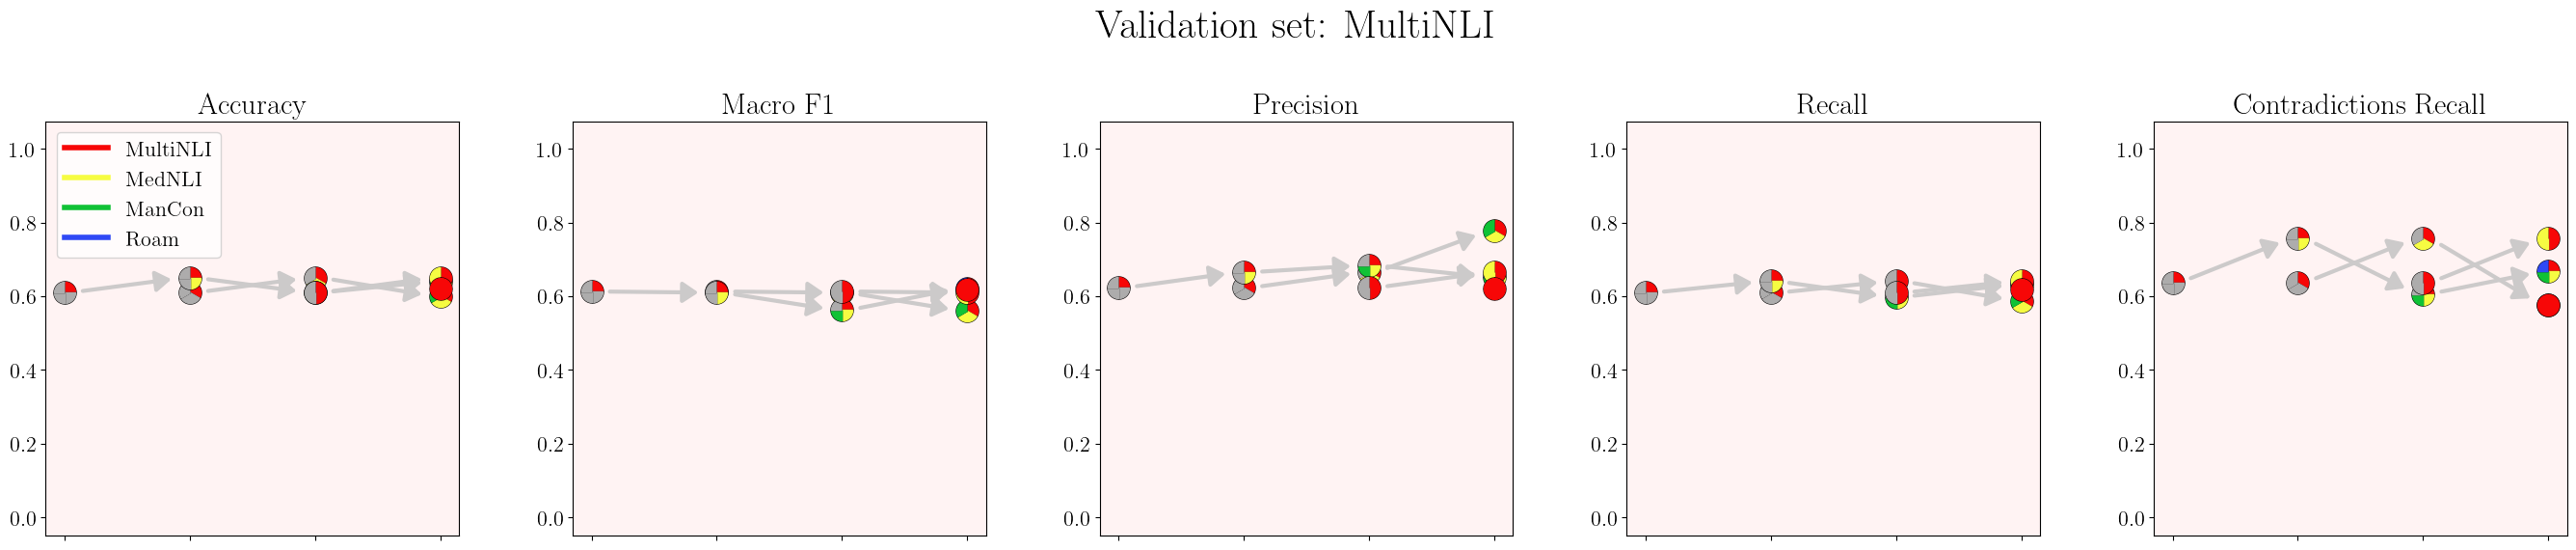

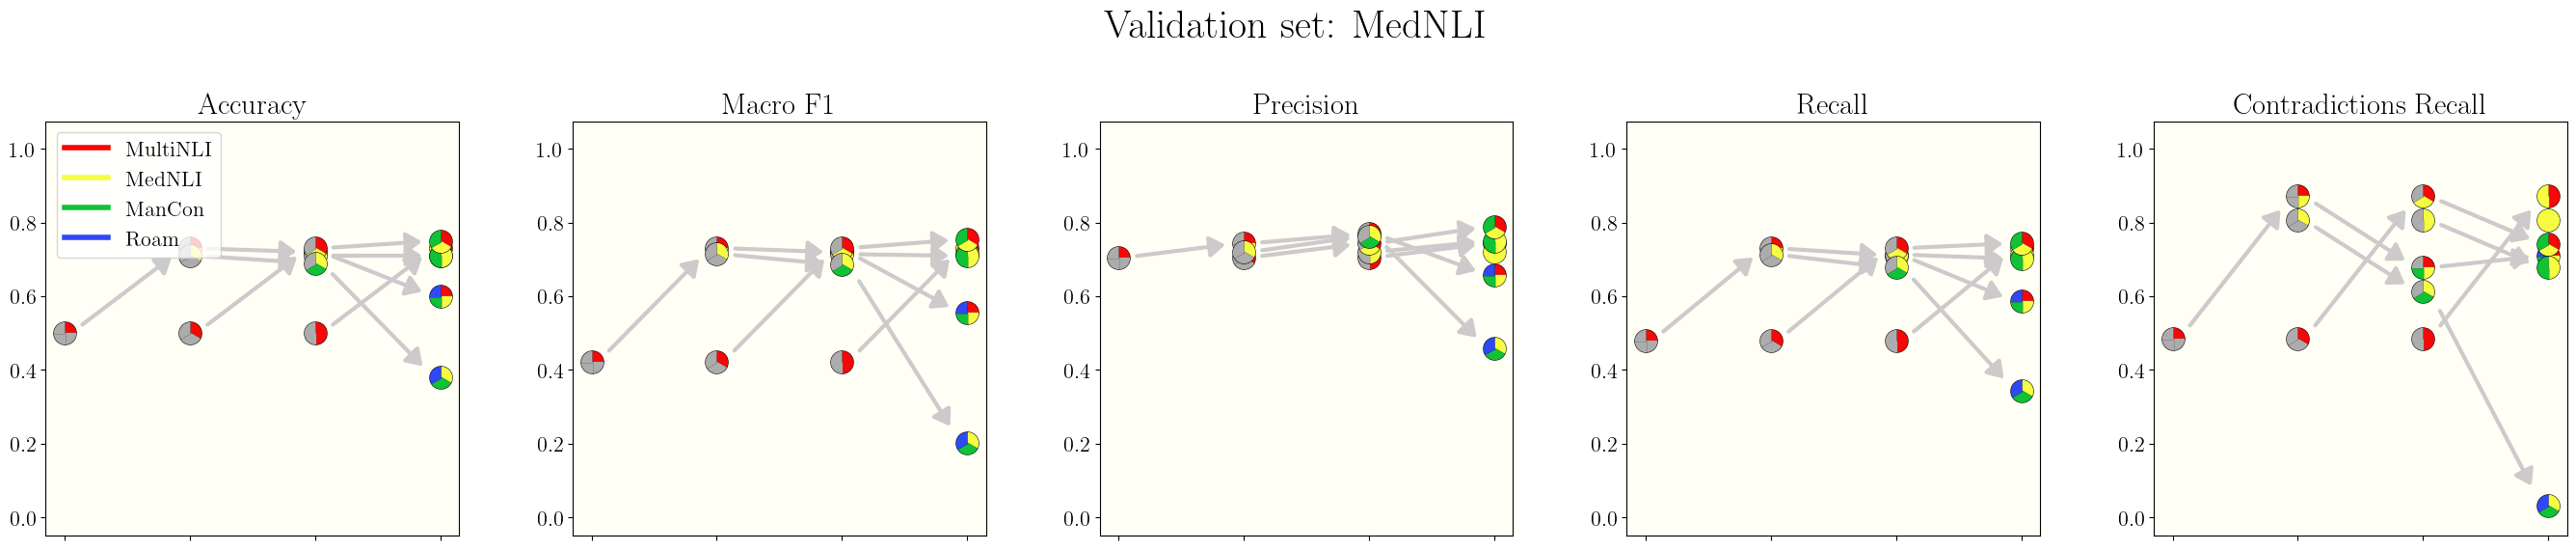

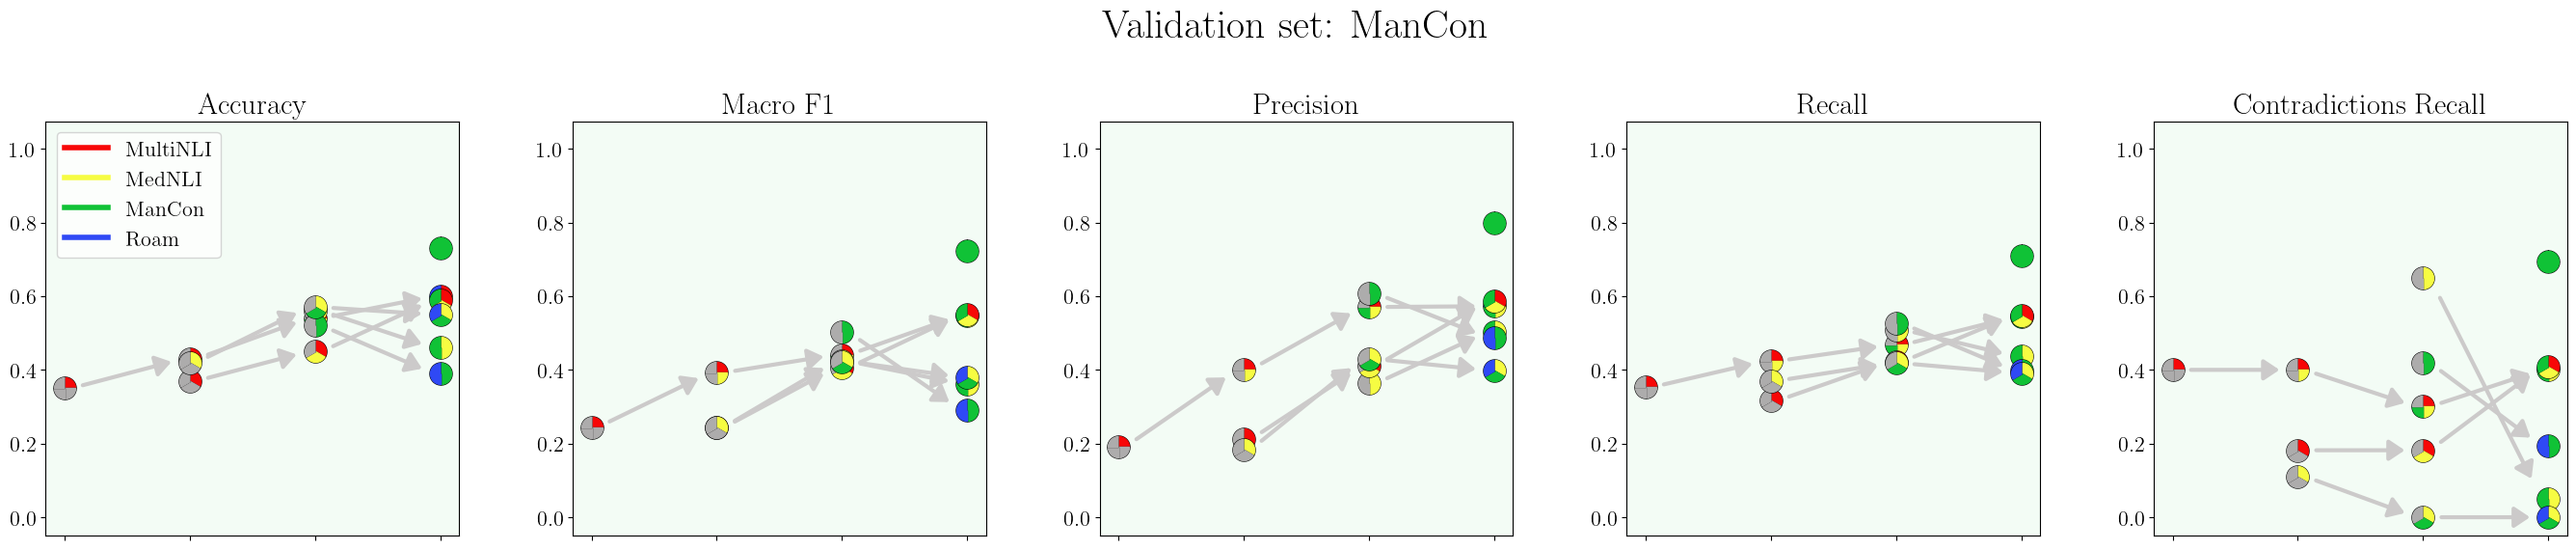

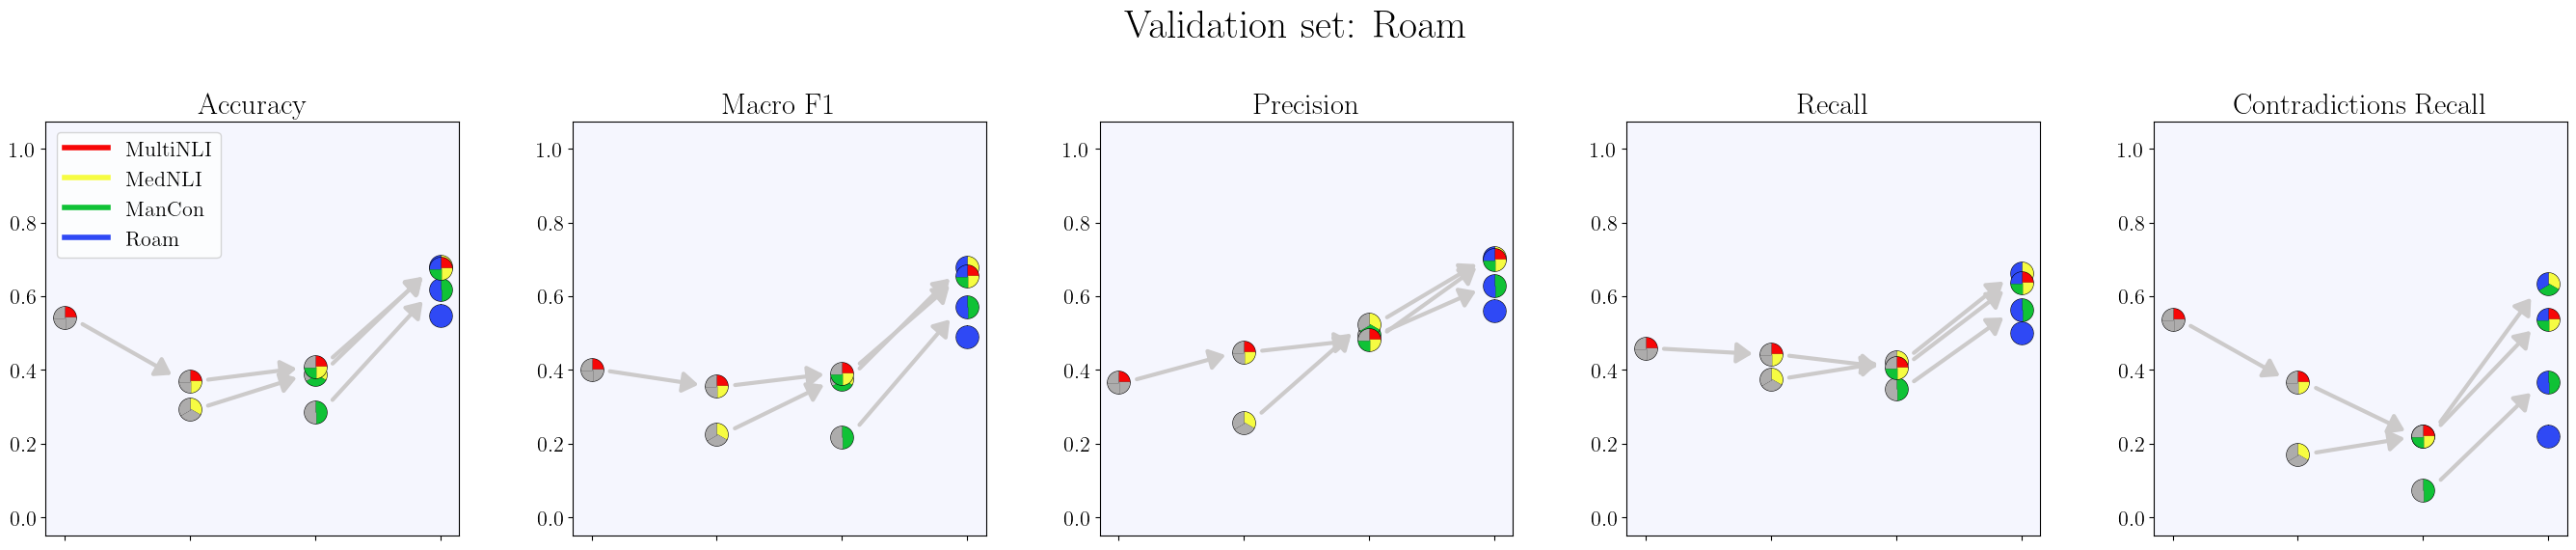

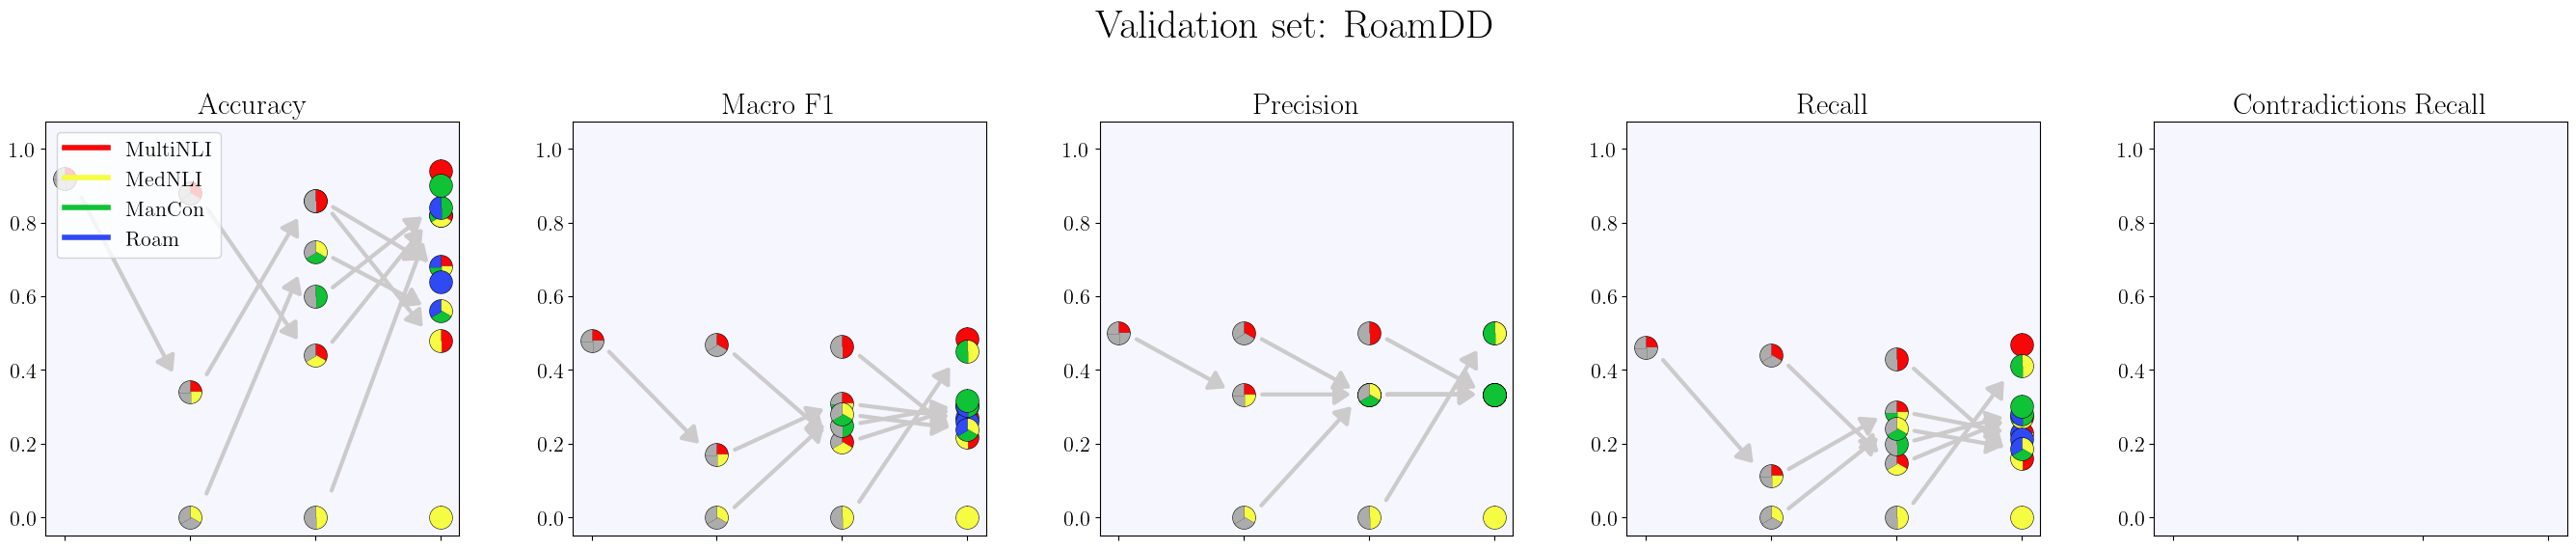

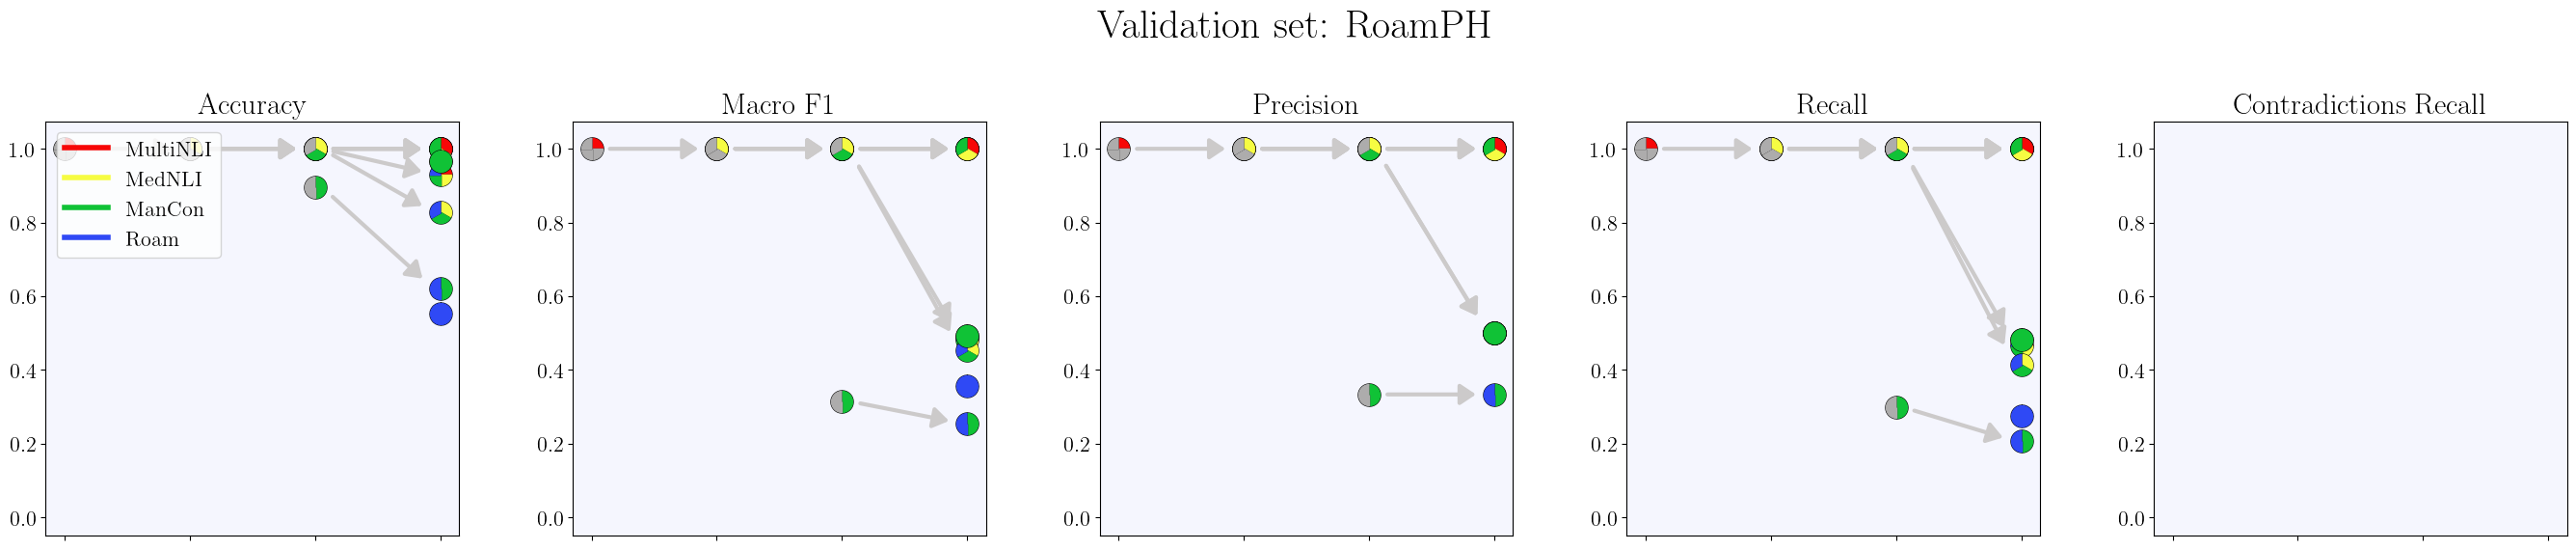

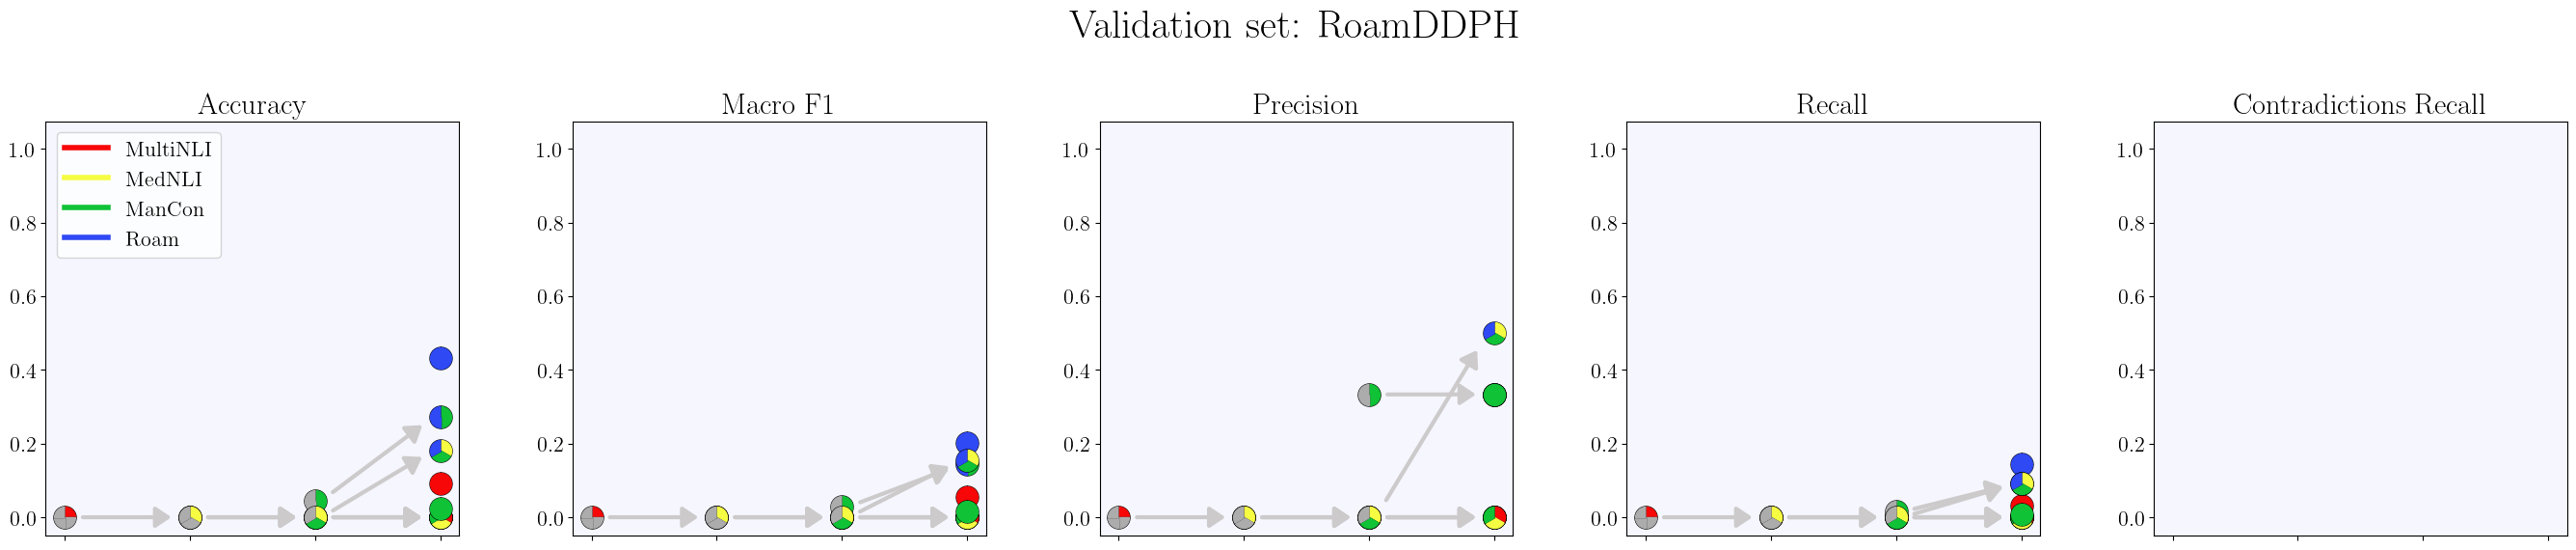

LEARNING RATE: 0.0001


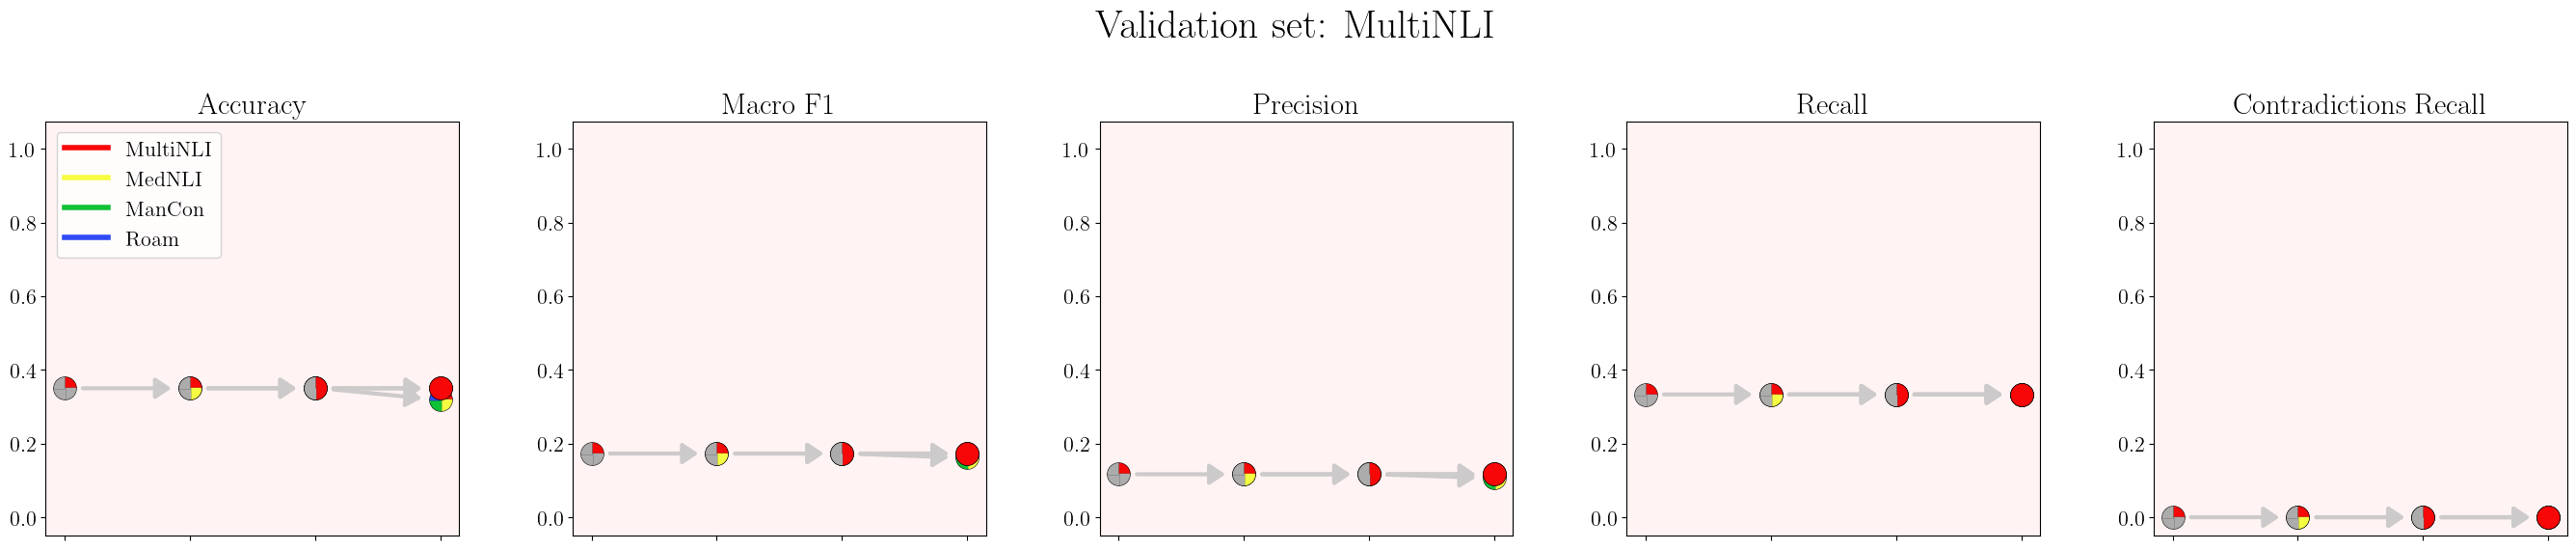

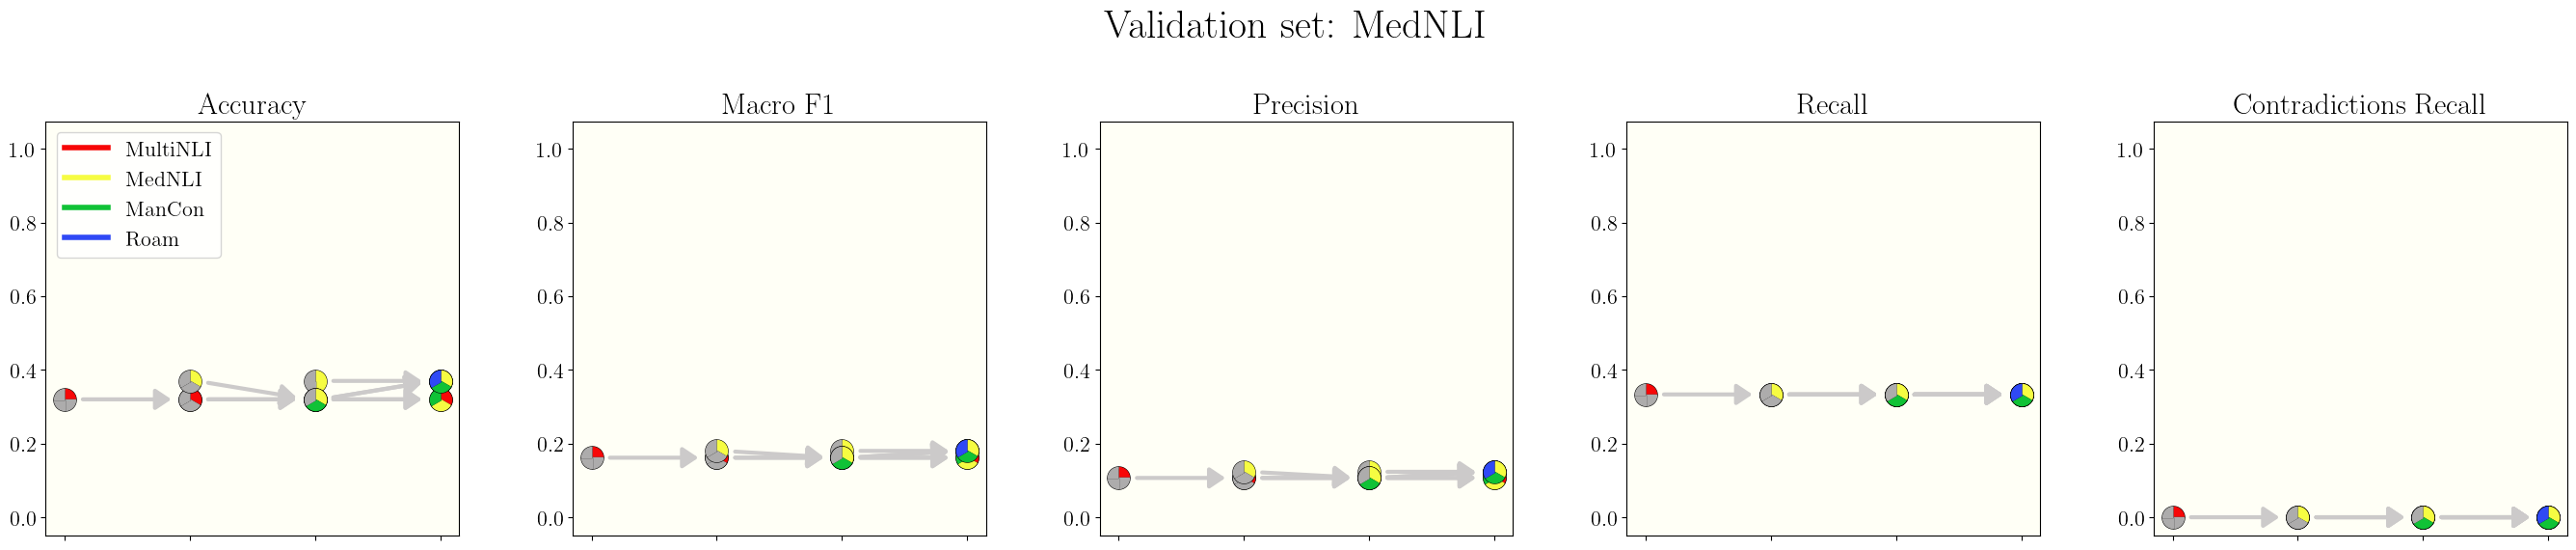

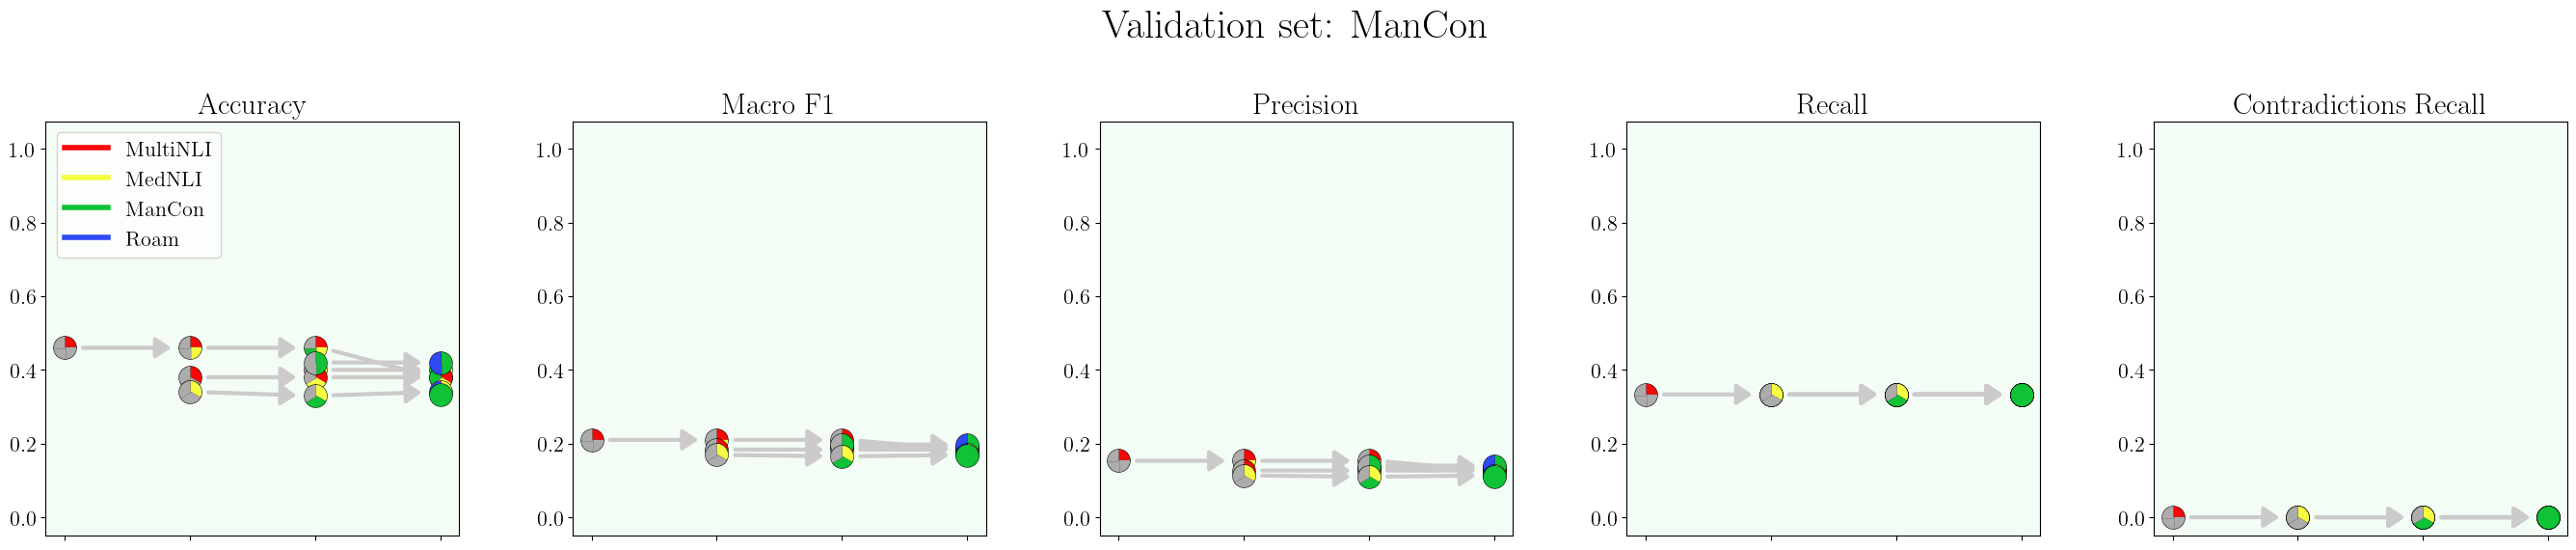

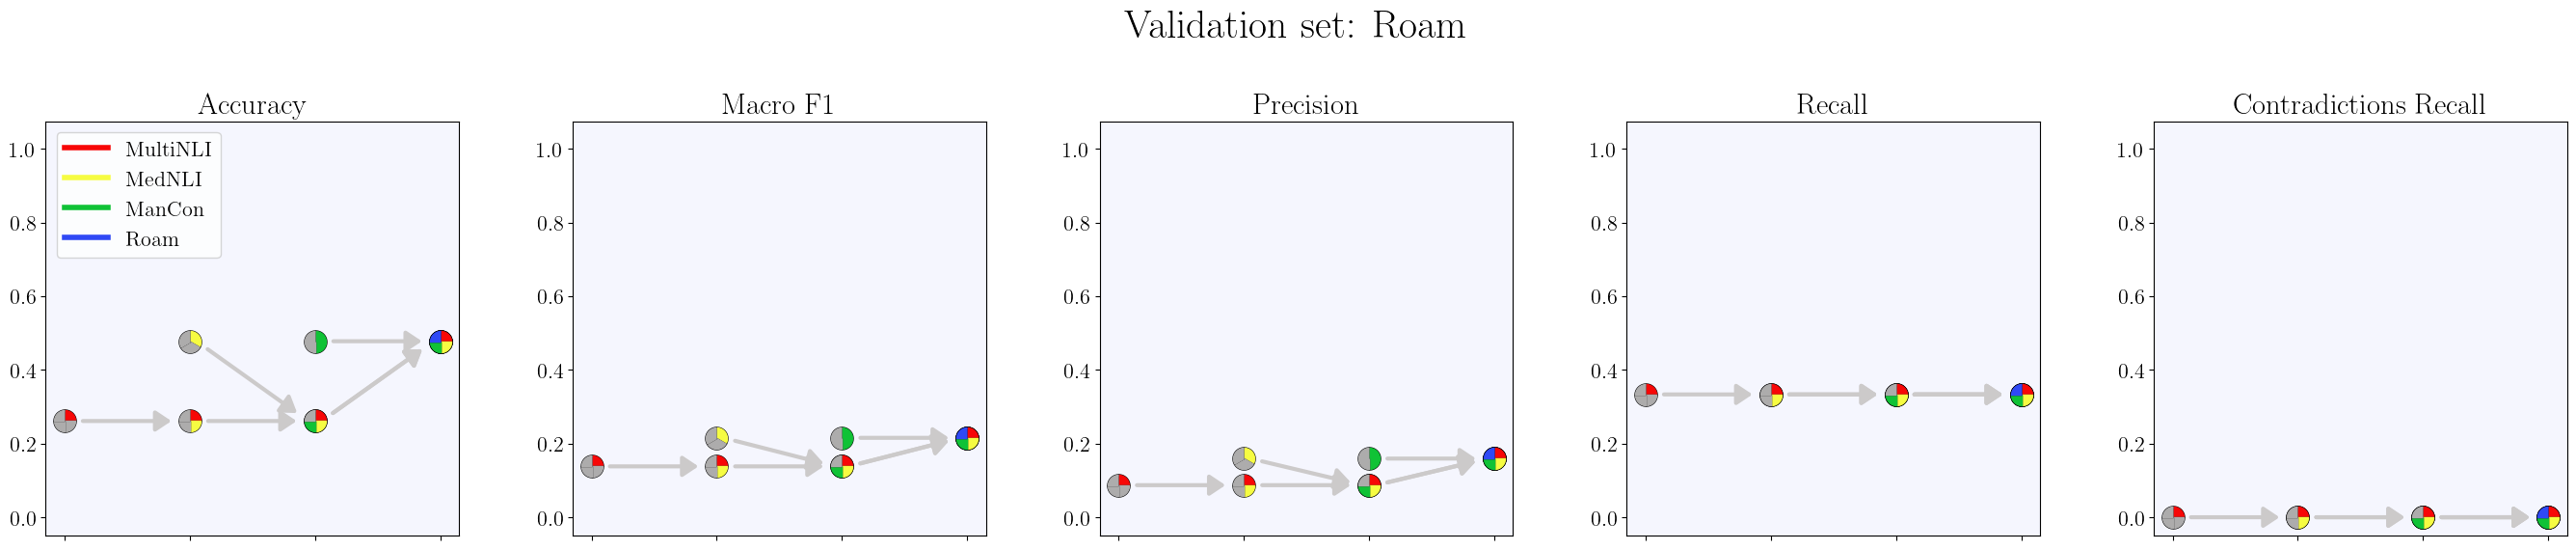

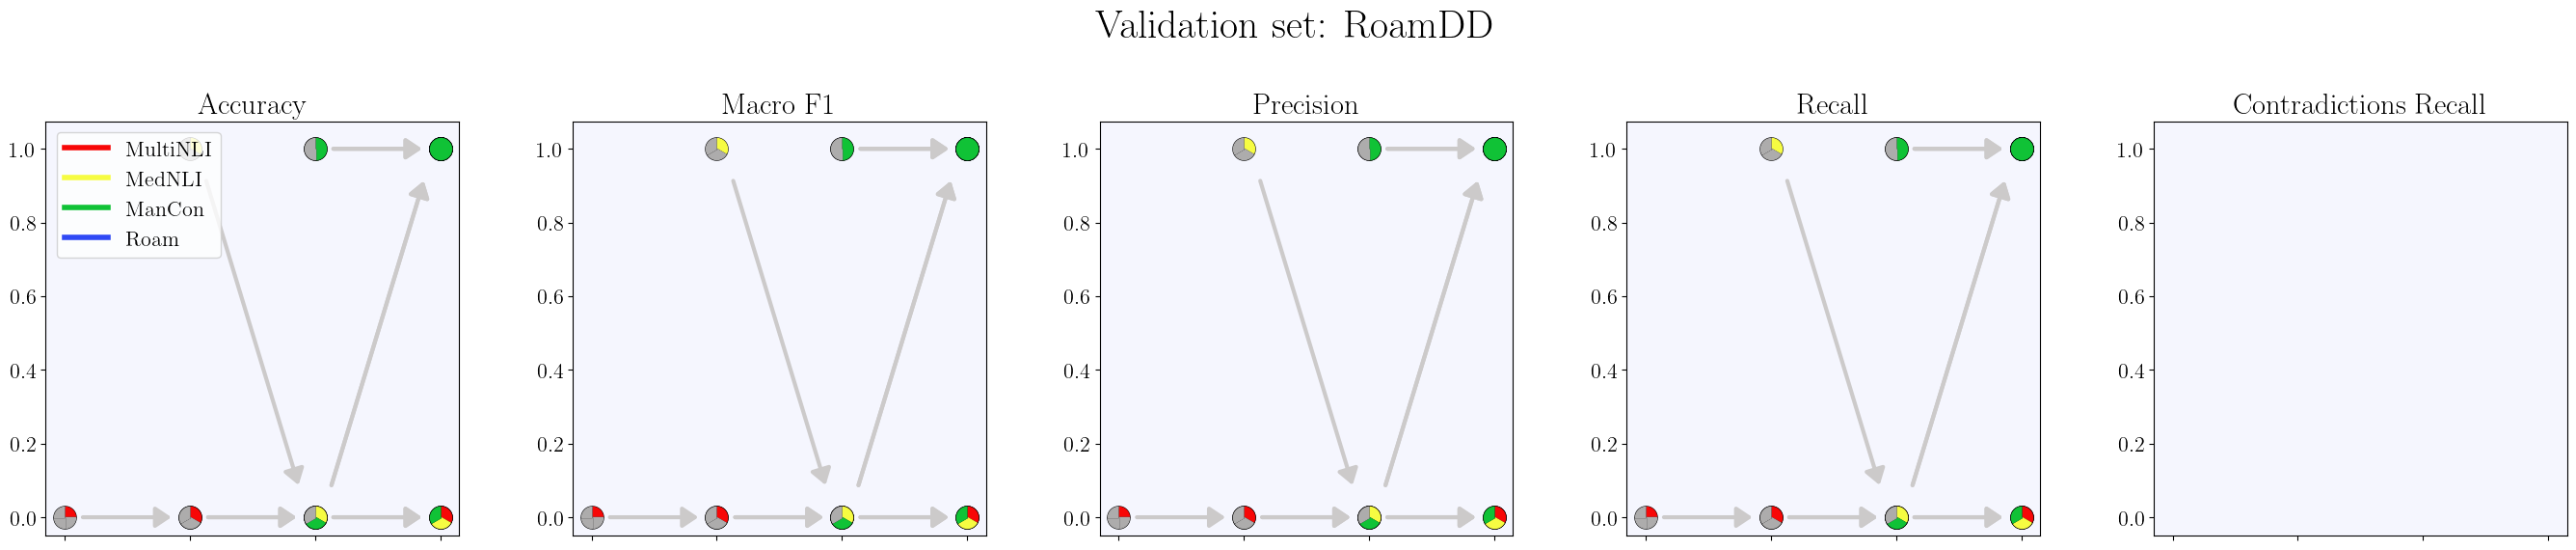

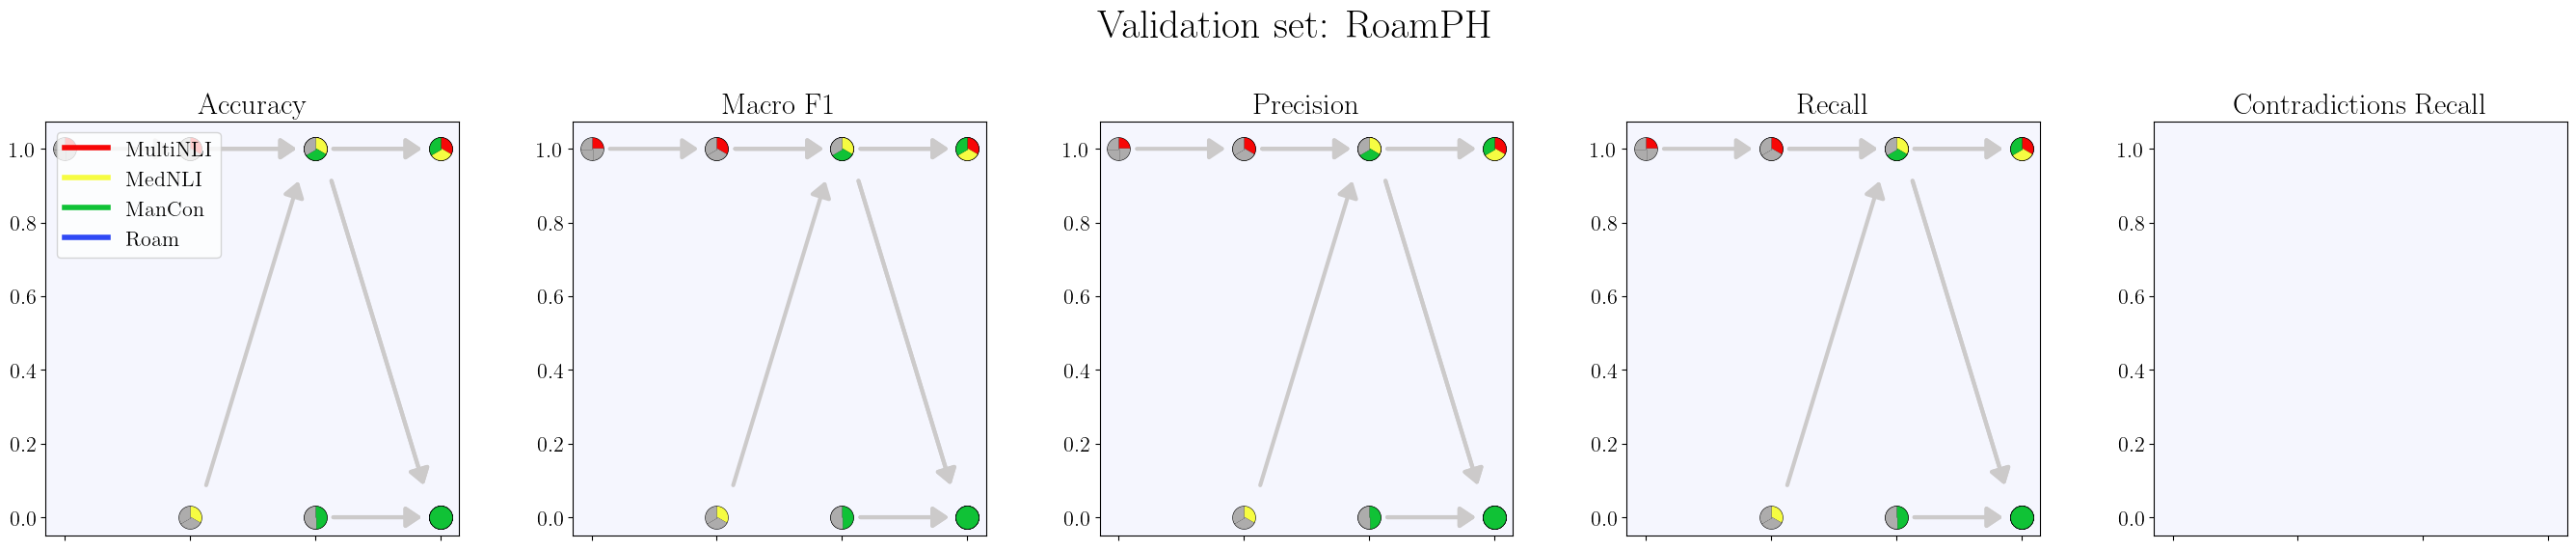

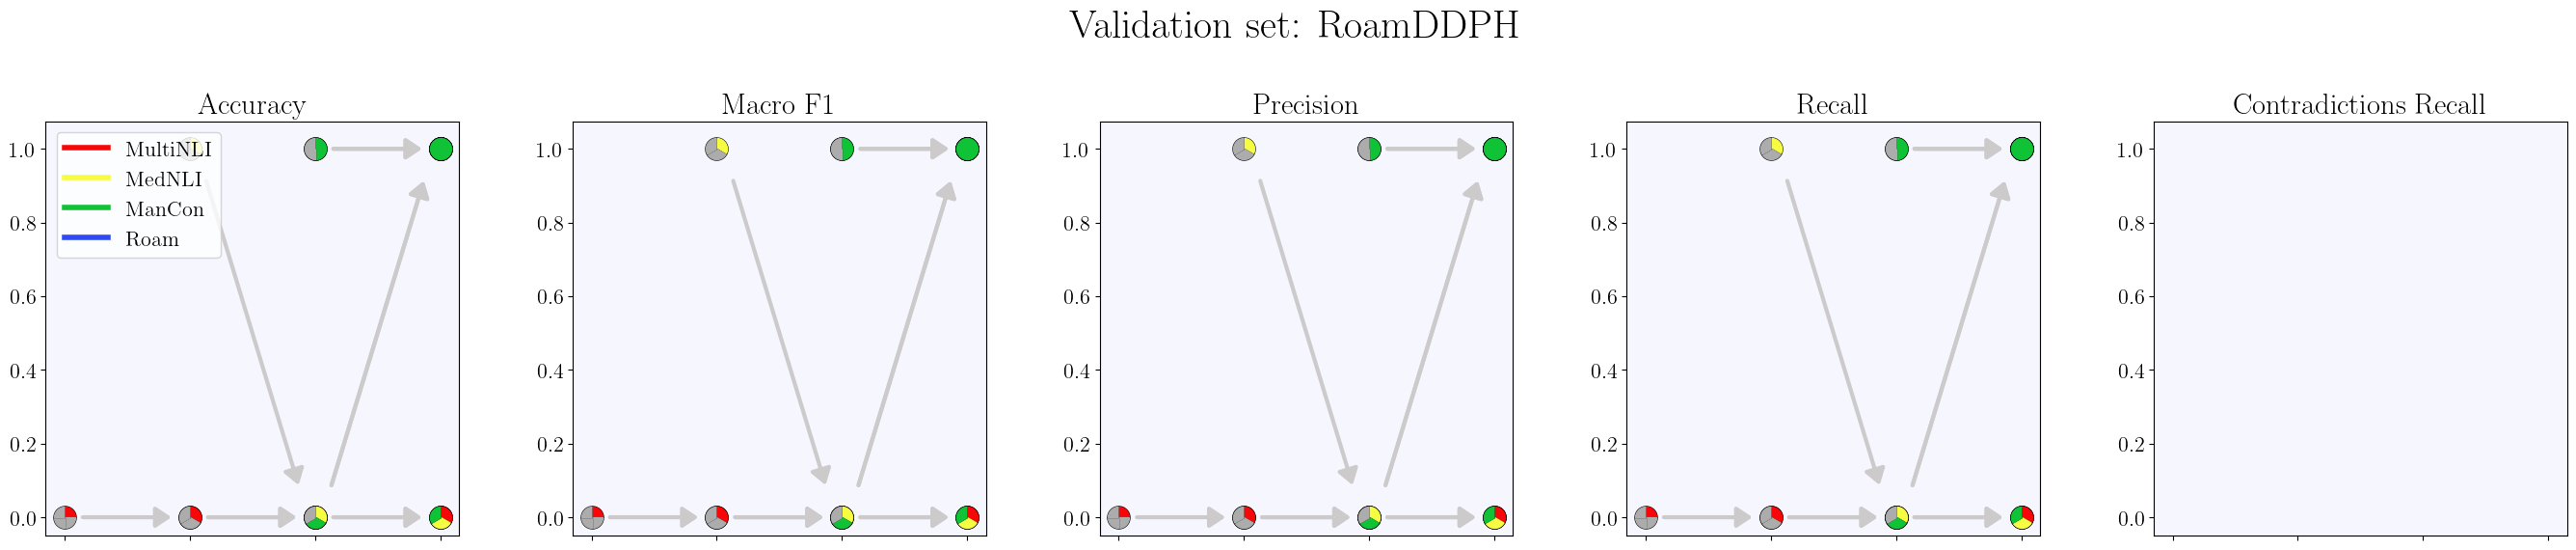

In [455]:
from collections import OrderedDict

dataset_color_map = OrderedDict({"multinli": "#f70707", "mednli": "#f6fc42", "mancon": "#10c236", "roam": "#2f49f5", "roamDD": "#2f49f5", "roamPH": "#2f49f5", "roamDDPH": "#2f49f5"})
dataset_name_map = OrderedDict({"multinli": "MultiNLI", "mednli": "MedNLI", "mancon": "ManCon", "roam": "Roam", "roamDD": "RoamDD", "roamPH": "RoamPH", "roamDDPH": "RoamDDPH"})

metric = "accuracy"
metrics = OrderedDict({"accuracy": "Accuracy",
                       "f1": "Macro F1",
                       "precision": "Precision",
                       "recall": "Recall",
                       "recall_con": "Contradictions Recall"})

metrics_to_vis = metrics.keys()

for lr in set(df["learning_rate"]):
    print(f"LEARNING RATE: {lr}")
    sub_df = df[df["learning_rate"] == lr]

    #for i, metric in enumerate(metrics.keys()):
    for val_set, val_set_official in dataset_name_map.items():

        fig, axs = plt.subplots(1, len(metrics_to_vis), figsize=(28,6))
        fig.tight_layout(pad=3.0)

        in_df = sub_df[sub_df["Validation Set"] == val_set]
        val_color = lighten_color(dataset_color_map[val_set], 0.95)

        for seq in set(in_df["train_datasets"]):
            seq_df = in_df[in_df["train_datasets"] == seq]

            for i, metric in enumerate(metrics_to_vis):

                axs[i].set_ylim([-.05,1.075])
                axs[i].set_title(metrics[metric])
                axs[i].set_facecolor(val_color)

                # TODO: Combine all results together?
                draw_arrows(seq_df, metric=metric, x_pad=0.125, arrow_prox=0.92, arrow_color='#cccaca', y_text_pad=.05, in_ax=axs[i])
                draw_pie_scatter(seq_df, metric=metric, background_color="#adacac", size=250, in_ax=axs[i])
                if i == 0:
                    draw_custom_legends(seq_df, ds_color_map=dataset_color_map, ds_name_map=dataset_name_map, val_ds=val_set, val_color=val_color, in_ax=axs[i])

                axs[i].xaxis.set_ticks(np.arange(1,5))
                axs[i].set_xticklabels('')

        fig.suptitle(f'Validation set: {val_set_official}\n\n\n', y=1.07)
        plt.show()

In [450]:
in_df[["Validation Set", "train_datasets", "Cumulative Training", "Latest Training", "cum_train_idx", "accuracy", "f1", "precision", "recall", "recall_con", "learning_rate"]]


,Validation Set,train_datasets,Cumulative Training,Latest Training,cum_train_idx,accuracy,f1,precision,recall,recall_con,learning_rate


In [8]:
import pandas as pd

pd.DataFrame(data)

,roam,mancon,mednli,multinli,train_datasets,eval_datasets,epochs,batch_size,learning_rate,truncation,train_prep_experiment,data_ratios,mancon_neutral_frac,mancon_train_frac,wandb_log_interval
accuracy,0.503185,0.460000,0.640000,0.560000,roam_mancon_mednli_multinli,roam_mancon_mednli_multinli,10,16,0.00005,True,sequential,1,1,0.67,10
f1,0.452174,0.445107,0.610903,0.554351,roam_mancon_mednli_multinli,roam_mancon_mednli_multinli,10,16,0.00005,True,sequential,1,1,0.67,10
precision,0.505432,0.542749,0.739153,0.555209,roam_mancon_mednli_multinli,roam_mancon_mednli_multinli,10,16,0.00005,True,sequential,1,1,0.67,10
recall,0.483794,0.521064,0.625863,0.556539,roam_mancon_mednli_multinli,roam_mancon_mednli_multinli,10,16,0.00005,True,sequential,1,1,0.67,10
recall_con,0.707317,0.888889,0.677419,0.515152,roam_mancon_mednli_multinli,roam_mancon_mednli_multinli,10,16,0.00005,True,sequential,1,1,0.67,10


In [9]:
data

{'roam': {'accuracy': 0.5031847133757962,
  'f1': 0.45217391304347826,
  'precision': 0.5054316522670953,
  'recall': 0.4837940379403794,
  'recall_con': 0.7073170731707317},
 'mancon': {'accuracy': 0.46,
  'f1': 0.445106682394818,
  'precision': 0.5427486309839251,
  'recall': 0.521064435958053,
  'recall_con': 0.8888888888888888},
 'mednli': {'accuracy': 0.64,
  'f1': 0.6109031198686371,
  'precision': 0.7391534391534392,
  'recall': 0.6258627579192094,
  'recall_con': 0.6774193548387096},
 'multinli': {'accuracy': 0.56,
  'f1': 0.5543510928961749,
  'precision': 0.5552094920281795,
  'recall': 0.5565386002886002,
  'recall_con': 0.5151515151515151},
 'train_datasets': 'roam_mancon_mednli_multinli',
 'eval_datasets': 'roam_mancon_mednli_multinli',
 'epochs': 10,
 'batch_size': 16,
 'learning_rate': 5e-05,
 'truncation': True,
 'train_prep_experiment': 'sequential',
 'data_ratios': '1',
 'mancon_neutral_frac': 1,
 'mancon_train_frac': 0.67,
 'wandb_log_interval': 10}

In [10]:
overall_results = {'roam': {'accuracy': 0.5031847133757962,
  'f1': 0.45217391304347826,
  'precision': 0.5054316522670953,
  'recall': 0.4837940379403794,
  'recall_con': 0.7073170731707317},
 'mancon': {'accuracy': 0.46,
  'f1': 0.445106682394818,
  'precision': 0.5427486309839251,
  'recall': 0.521064435958053,
  'recall_con': 0.8888888888888888},
 'mednli': {'accuracy': 0.64,
  'f1': 0.6109031198686371,
  'precision': 0.7391534391534392,
  'recall': 0.6258627579192094,
  'recall_con': 0.6774193548387096},
 'multinli': {'accuracy': 0.56,
  'f1': 0.5543510928961749,
  'precision': 0.5552094920281795,
  'recall': 0.5565386002886002,
  'recall_con': 0.5151515151515151}}

In [23]:
xx = pd.DataFrame(overall_results).T
xx

#pd.melt(xx, id_vars=['accuracy'], value_vars=['roam']
xx['val_model'] = xx.index
yy = xx.reset_index(drop=True)

In [24]:
[yy, yy, yy]

[   accuracy        f1  precision    recall  recall_con val_model
 0  0.503185  0.452174   0.505432  0.483794    0.707317      roam
 1  0.460000  0.445107   0.542749  0.521064    0.888889    mancon
 2  0.640000  0.610903   0.739153  0.625863    0.677419    mednli
 3  0.560000  0.554351   0.555209  0.556539    0.515152  multinli,
    accuracy        f1  precision    recall  recall_con val_model
 0  0.503185  0.452174   0.505432  0.483794    0.707317      roam
 1  0.460000  0.445107   0.542749  0.521064    0.888889    mancon
 2  0.640000  0.610903   0.739153  0.625863    0.677419    mednli
 3  0.560000  0.554351   0.555209  0.556539    0.515152  multinli,
    accuracy        f1  precision    recall  recall_con val_model
 0  0.503185  0.452174   0.505432  0.483794    0.707317      roam
 1  0.460000  0.445107   0.542749  0.521064    0.888889    mancon
 2  0.640000  0.610903   0.739153  0.625863    0.677419    mednli
 3  0.560000  0.554351   0.555209  0.556539    0.515152  multinli]

In [30]:
zz = overall_results['roam']

In [32]:
pd.DataFrame([zz, zz, zz])

,accuracy,f1,precision,recall,recall_con
0,0.503185,0.452174,0.505432,0.483794,0.707317
1,0.503185,0.452174,0.505432,0.483794,0.707317
2,0.503185,0.452174,0.505432,0.483794,0.707317


In [33]:
"recall_con".capitalize()

'Recall_con'

In [35]:
"_".join(["test"][:-1])

''

In [36]:
zz

{'accuracy': 0.5031847133757962,
 'f1': 0.45217391304347826,
 'precision': 0.5054316522670953,
 'recall': 0.4837940379403794,
 'recall_con': 0.7073170731707317}

In [37]:
zz.update({"tst": 5})

In [38]:
zz

{'accuracy': 0.5031847133757962,
 'f1': 0.45217391304347826,
 'precision': 0.5054316522670953,
 'recall': 0.4837940379403794,
 'recall_con': 0.7073170731707317,
 'tst': 5}